In [556]:
import sys
sys.executable

'/Users/morilla/Python3/bin/python'

In [557]:
import numpy as np
np.random.seed(seed=42)
from gtda.homology import VietorisRipsPersistence
from gtda.homology import EuclideanCechPersistence
#from gtda.homology import CubicalPersistence

In [558]:
from gtda.plotting import plot_point_cloud
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceLandscape, Silhouette


In [559]:
import pandas as pd
M = pd.read_excel('./Base de donnees greffe pulmonaire_Ian.xlsx', index_col=0)

In [560]:
M

NIP (identifiant) date de TP  Age  Sexe (0=F, 1=M)  \
NOM                                                                       
Abdalla                     8005805551 2015-03-31   52                0   
ABDAT                       8009205234 2017-12-28   63                1   
AHMED                       8004902968 2019-11-29   45                1   
AIT ALI                     8009284788 2018-11-27   56                0   
ALAZARD                     8004982944 2017-08-13   63                0   
...                                ...        ...  ...              ...   
VISEUR                      8006790644 2017-12-10   30                1   
WEYRECH                     8010392741 2018-09-01   60                1   
Williez Dangauthier         8005651509 2015-09-08   69                0   
Yahiaoui                    8012865900 2019-11-07   56                1   
YEBBOU                      8003598628 2018-07-08   53                0   

                     BMI (body mass index)  BMI< ou egal 18  BMI>30  BMI>25  \
NOM                                                                           
Abdalla                               26.0                0       0       1   
ABDAT                                 18.0                1       0       0   
AHMED                                 31.0                0       1       1   
AIT ALI                               28.0                0       0       1   
ALAZARD                               20.0                0       0       0   
...                                    ...              ...     ...     ...   
VISEUR                                17.0                1       0       0   
WEYRECH                               30.3                0       1       1   
Williez Dangauthier                   16.0                1       0       0   
Yahiaoui                              29.9                0       0       1   
YEBBOU                                24.7                0       0       1   

                     cardiopathie ischémique  diabètepré-opératoire  ...  \
NOM                                                                  ...   
Abdalla                                    0                      1  ...   
ABDAT                                      0                      0  ...   
AHMED                                      0                      0  ...   
AIT ALI                                    0                      0  ...   
ALAZARD                                    0                      0  ...   
...                                      ...                    ...  ...   
VISEUR                                     0                      0  ...   
WEYRECH                                    0                      0  ...   
Williez Dangauthier                        0                      0  ...   
Yahiaoui                                   0                      1  ...   
YEBBOU                                     0                      0  ...   

                     Sténose bronchique grave dans l'année (stent ou dilatation)  \
NOM                                                                                
Abdalla                                                              0             
ABDAT                                                                0             
AHMED                                                                1             
AIT ALI                                                              1             
ALAZARD                                                              1             
...                                                                ...             
VISEUR                                                               0             
WEYRECH                                                              0             
Williez Dangauthier                                                  0             
Yahiaoui                                                             0             
YEBBOU              

In [561]:
M.shape

(252, 46)

In [562]:
M.columns

Index(['NIP (identifiant)', 'date de TP', 'Age', 'Sexe (0=F, 1=M)',
       'BMI (body mass index)', 'BMI< ou egal 18', 'BMI>30', 'BMI>25',
       'cardiopathie ischémique', 'diabètepré-opératoire',
       'PAPM (pression artérielle pulmonaire moyenne)', 'étiologie BPCO',
       'étiologie Fibrose', 'Autres étiologies', 'Mismatch CMV (R-/D+)',
       'ECMO pré-opératoire', 'Super Urgence',
       'type de TP (0=monopulmonaire, 1=bipulmonaire)', 'Ischémie Froide Max',
       'Analgésie péridurale ', 'ECMO peropératoire ',
       'Transfusion per opératoire >2 CGR', 'SOFA J0', 'IGS2 J0',
       'Nb Jours Noradrénaline ', 'Nb Jours Ventilation mécanique',
       'ECMO en Réanimation', 'Nb jours d'ECMO en réanimation',
       'Dysfonction primaire du greffon grade 3 ', 'insuffisance rénale aiguë',
       'dialyse en réanimation', 'bactériémie', 'Pneumonie (tous germes)',
       'Pneumonie à BLSE et/ou Pyo en réanimation',
       'Pneumonie acquise sous ventilation mécanique à BLSE et/ou Pyo

In [563]:
M.columns = M.columns.str.replace(' ','_')

In [564]:
M.columns

Index(['NIP_(identifiant)', 'date_de_TP', 'Age', 'Sexe_(0=F,_1=M)',
       'BMI_(body_mass_index)', 'BMI<_ou_egal_18', 'BMI>30', 'BMI>25',
       'cardiopathie_ischémique', 'diabètepré-opératoire',
       'PAPM_(pression_artérielle_pulmonaire_moyenne)', 'étiologie_BPCO',
       'étiologie_Fibrose', 'Autres_étiologies', 'Mismatch_CMV_(R-/D+)',
       'ECMO_pré-opératoire', 'Super_Urgence',
       'type_de_TP_(0=monopulmonaire,_1=bipulmonaire)', 'Ischémie_Froide_Max',
       'Analgésie_péridurale_', 'ECMO_peropératoire_',
       'Transfusion_per_opératoire_>2_CGR', 'SOFA_J0', 'IGS2_J0',
       'Nb_Jours_Noradrénaline_', 'Nb_Jours_Ventilation_mécanique',
       'ECMO_en_Réanimation', 'Nb_jours_d'ECMO_en_réanimation',
       'Dysfonction_primaire_du_greffon_grade_3_', 'insuffisance_rénale_aiguë',
       'dialyse_en_réanimation', 'bactériémie', 'Pneumonie_(tous_germes)',
       'Pneumonie_à_BLSE_et/ou_Pyo_en_réanimation',
       'Pneumonie_acquise_sous_ventilation_mécanique_à_BLSE_et/ou_Pyo

In [565]:
y = M.mortalité_à_un_an

In [566]:
y

NOM
Abdalla                0
ABDAT                  0
AHMED                  0
AIT ALI                0
ALAZARD                0
                      ..
VISEUR                 0
WEYRECH                0
Williez Dangauthier    0
Yahiaoui               0
YEBBOU                 0
Name: mortalité_à_un_an, Length: 252, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler
df = M.drop(['NIP_(identifiant)', 'date_de_TP'], axis=1)
df_standard_scale=pd.DataFrame(StandardScaler().fit_transform(df))

In [14]:
#df=df.dropna()
#df=df.reset_index()

In [15]:
df_standard_scale.columns

RangeIndex(start=0, stop=44, step=1)

In [16]:
where_are_NaNs = np.isnan(df_standard_scale)
df_standard_scale[where_are_NaNs] = 0
df_standard_scale.head()

0         1         2         3         4         5         6   \
0 -0.204075 -1.330124  0.459695 -0.394922 -0.367607  1.091469 -0.213643   
1  0.795388  0.751809 -1.263521  2.532146 -0.367607 -0.916197 -0.213643   
2 -0.840097  0.751809  1.536705 -0.394922  2.720294  1.091469 -0.213643   
3  0.159366 -1.330124  0.890499 -0.394922 -0.367607  1.091469 -0.213643   
4  0.795388 -1.330124 -0.832717 -0.394922 -0.367607 -0.916197 -0.213643   

         7         8         9   ...        34        35        36        37  \
0  2.886751  0.000000 -0.745356  ... -0.577350 -0.421391 -0.491304 -0.566615   
1 -0.346410  0.425519  1.341641  ... -0.577350 -0.421391 -0.491304 -0.566615   
2 -0.346410 -0.093490 -0.745356  ...  1.732051 -0.421391 -0.491304 -0.566615   
3 -0.346410 -1.261259 -0.745356  ...  1.732051  2.373095 -0.491304 -0.566615   
4 -0.346410 -1.261259 -0.745356  ...  1.732051 -0.421391 -0.491304 -0.566615   

         38        39        40       41        42        43  
0 -0.426401  1.042439 -0.434372 -0.57735 -0.434372 -0.309277  
1 -0.426401 -0.528232 -0.434372 -0.57735 -0.434372 -0.309277  
2  0.000000 -0.206958 -0.434372 -0.57735 -0.434372 -0.309277  
3 -0.426401  0.863954 -0.434372 -0.57735 -0.434372 -0.309277  
4 -0.426401 -0.599626 -0.434372 -0.57735 -0.434372 -0.309277  

[5 rows x 44 columns]

In [17]:
df_standard_scale.index = df.index
df_standard_scale.columns = df.columns

In [18]:
df_standard_scale.head()

Age  Sexe_(0=F,_1=M)  BMI_(body_mass_index)  BMI<_ou_egal_18  \
NOM                                                                          
Abdalla -0.204075        -1.330124               0.459695        -0.394922   
ABDAT    0.795388         0.751809              -1.263521         2.532146   
AHMED   -0.840097         0.751809               1.536705        -0.394922   
AIT ALI  0.159366        -1.330124               0.890499        -0.394922   
ALAZARD  0.795388        -1.330124              -0.832717        -0.394922   

           BMI>30    BMI>25  cardiopathie_ischémique  diabètepré-opératoire  \
NOM                                                                           
Abdalla -0.367607  1.091469                -0.213643               2.886751   
ABDAT   -0.367607 -0.916197                -0.213643              -0.346410   
AHMED    2.720294  1.091469                -0.213643              -0.346410   
AIT ALI -0.367607  1.091469                -0.213643              -0.346410   
ALAZARD -0.367607 -0.916197                -0.213643              -0.346410   

         PAPM_(pression_artérielle_pulmonaire_moyenne)  étiologie_BPCO  ...  \
NOM                                                                     ...   
Abdalla                                       0.000000       -0.745356  ...   
ABDAT                                         0.425519        1.341641  ...   
AHMED                                        -0.093490       -0.745356  ...   
AIT ALI                                      -1.261259       -0.745356  ...   
ALAZARD                                      -1.261259       -0.745356  ...   

         Sténose_bronchique_grave_dans_l'année_(stent_ou_dilatation)  \
NOM                                                                    
Abdalla                                          -0.577350             
ABDAT                                            -0.577350             
AHMED                                             1.732051             
AIT ALI                                           1.732051             
ALAZARD                                           1.732051             

         Fistule_bronchique_dans_l'année  rejet_humoral_dans_l'année  \
NOM                                                                    
Abdalla                        -0.421391                   -0.491304   
ABDAT                          -0.421391                   -0.491304   
AHMED                          -0.421391                   -0.491304   
AIT ALI                         2.373095                   -0.491304   
ALAZARD                        -0.421391                   -0.491304   

         rejet_cellulaire_dans_l'année_  pleurésie_<1an  \
NOM                                                       
Abdalla                       -0.566615       -0.426401   
ABDAT                         -0.566615       -0.426401   
AHMED                         -0.566615        0.000000   
AIT ALI                       -0.566615       -0.426401   
ALAZARD                       -0.566615       -0.426401   

         durée_de_séjour_en_réanimation_(1er_séjour)  \
NOM                                                    
Abdalla                                     1.042439   
ABDAT                                      -0.528232   
AHMED                                      -0.206958   
AIT ALI                                     0.863954   
ALAZARD                                    -0.599626   

         mortalité_dans_le_premier_séjour_réanimation  mortalité_à_un_an  \
NOM                                                                        
Abdalla                                     -0.434372           -0.57735   
ABDAT                                       -0.434372           -0.57735   
AHMED                                       -0.434372           -0.57735   
AIT ALI                                     -0.434372           -0.57735   
ALAZARD                                     -0.434372           -0.57735   

         

In [19]:
M2 = pd.read_excel('./Base de donnees greffe pulmonaire_Ian_Samy.xlsx', index_col=0)

/Users/morilla/Python3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [20]:
M2.columns = ["NIP (ID)", "Date of TP", "Age", "Age >= 60", "Sex (0=F, 1=M)", "BMI (body mass index)", "BMI < 18", 
              "BMI > 30", "BMI > 25", "Ischemic heart disease", "Pre-operative diabetes", 
              "PAPM (mean pulmonary arterial pressure)", "PAPM > 20", "Etiology BPCO", "Etiology Fibrosis", 
              "Other etiologies", "CMV Mismatch", "Pre-operative ECMO", "Super Urgency", 
              "Type of TP (0=single lung, 1=double lung)", "Max Cold Ischemia", "Max Cold Ischemia > 6h", 
              "Peridural Analgesia", "Perioperative ECMO", "Peroperative Transfusion > 2 U", "SOFA Day 0", 
              "SOFA >= 7", "IGS2 Day 0", "IGS2 >= 43", "# Days Noradrenaline", "# Days Noradrenaline >= 2", 
              "# Days Mechanical Ventilation", "# Days Mechanical Ventilation >= 3", "ECMO in ICU", 
              "# Days ECMO in ICU", "# Days ECMO in ICU >= 1", "Primary Graft Dysfunction grade 3", 
              "Acute Renal Failure", "Dialysis in ICU", "Bacteremia", "Pneumonia (all germs)", 
              "Pneumonia with BLSE and/or abscess in ICU", "Tracheotomy", 
              "Severe bronchial stenosis in past year (stent or dilation)", "Bronchial fistula in past year", 
              "Humoral rejection in past year", "Cellular rejection in past year", "Pleurisy < 1 year", 
              "ICU stay duration", "ICU stay duration >= 15 days", "Mortality in first ICU stay", 
              "1-year mortality", "Mortality at Day 90", "Mortality at Day 30"]

In [21]:
new_text = []
for item in M2.columns:
    if ">" in item or "<" in item or " (" in item or ") " in item or "# " in item:
        new_text.append(item.replace(" ", ""))
    else:
        new_text.append(item.replace(" ", "_"))

print(new_text)

['NIP(ID)', 'Date_of_TP', 'Age', 'Age>=60', 'Sex(0=F,1=M)', 'BMI(bodymassindex)', 'BMI<18', 'BMI>30', 'BMI>25', 'Ischemic_heart_disease', 'Pre-operative_diabetes', 'PAPM(meanpulmonaryarterialpressure)', 'PAPM>20', 'Etiology_BPCO', 'Etiology_Fibrosis', 'Other_etiologies', 'CMV_Mismatch', 'Pre-operative_ECMO', 'Super_Urgency', 'TypeofTP(0=singlelung,1=doublelung)', 'Max_Cold_Ischemia', 'MaxColdIschemia>6h', 'Peridural_Analgesia', 'Perioperative_ECMO', 'PeroperativeTransfusion>2U', 'SOFA_Day_0', 'SOFA>=7', 'IGS2_Day_0', 'IGS2>=43', '#DaysNoradrenaline', '#DaysNoradrenaline>=2', '#DaysMechanicalVentilation', '#DaysMechanicalVentilation>=3', 'ECMO_in_ICU', '#DaysECMOinICU', '#DaysECMOinICU>=1', 'Primary_Graft_Dysfunction_grade_3', 'Acute_Renal_Failure', 'Dialysis_in_ICU', 'Bacteremia', 'Pneumonia(allgerms)', 'Pneumonia_with_BLSE_and/or_abscess_in_ICU', 'Tracheotomy', 'Severebronchialstenosisinpastyear(stentordilation)', 'Bronchial_fistula_in_past_year', 'Humoral_rejection_in_past_year', 'Ce

In [22]:
new_text = ['NIP(ID)', 'Date_of_TP', 'Age', 'Age$\geq$60', 'Sex(0=F,1=M)', 'BMI(body_mass_index)', 'BMI$<$18', 'BMI$>$30', 
'BMI$>$25', 'Ischemic_heart_disease', 'Pre-operative_diabetes', 'PAPM(mean_pulmonary_arterial_pressure)', 'PAPM$>$20', 
'Etiology_BPCO', 'Etiology_Fibrosis', 'Other_etiologies', 'CMV_Mismatch', 'Pre-operative_ECMO', 'Super_Urgency', 
'Type_of_TP(0=single_lung,1=double_lung)', 'Max_Cold_Ischemia', 'Max_Cold_Ischemia$>$6h', 'Peridural_Analgesia', 
'Perioperative_ECMO', 'Peroperative_Transfusion$>$2U', 'SOFA_Day_0', 'SOFA$\geq$7', 'IGS2_Day_0', 'IGS2$\geq$43', 
'\#Days_Noradrenaline', '\#Days_Noradrenaline$\geq$2', '\#Days_Mechanical_Ventilation', '\#Days_Mechanical_Ventilation$\geq$3', 
'ECMO_in_ICU', '\#Days_ECMO_in_ICU', '\#Days_ECMO_in_ICU$\geq$1', 'Primary_Graft_Dysfunction_grade_3', 'Acute_Renal_Failure', 
'Dialysis_in_ICU', 'Bacteremia', 'Pneumonia(all_germs)', 'Pneumonia_with_BLSE_and/or_abscess_in_ICU', 'Tracheotomy', 
'Severe_bronchial_stenosis_in_past_year(stent_or_dilation)', 'Bronchial_fistula_in_past_year', 
'Humoral_rejection_in_past_year', 'Cellular_rejection_in_past_year', 'Pleurisy$<$1year', 'ICU_stay_duration', 
'ICU_stay_duration$\geq$15days', 'Mortality_in_first_ICU_stay', 'one_year_mortality', 'Mortality_at_Day_90', 
'Mortality_at_Day_30']

In [23]:
#M2.columns = M2.columns.str.strip()
#M2.columns = M2.columns.str.replace(' ','_')
M2.columns = new_text
M2

NIP(ID) Date_of_TP  Age  Age$\geq$60  Sex(0=F,1=M)  \
NOM                                                                          
Abdalla              8005805551 2015-03-31   52            0             0   
ABDAT                8009205234 2017-12-28   63            1             1   
AHMED                8004902968 2019-11-29   45            0             1   
AIT ALI              8009284788 2018-11-27   56            0             0   
ALAZARD              8004982944 2017-08-13   63            1             0   
...                         ...        ...  ...          ...           ...   
VISEUR               8006790644 2017-12-10   30            0             1   
WEYRECH              8010392741 2018-09-01   60            1             1   
Williez Dangauthier  8005651509 2015-09-08   69            1             0   
Yahiaoui             8012865900 2019-11-07   56            0             1   
YEBBOU               8003598628 2018-07-08   53            0             0   

                     BMI(body_mass_index)  BMI$<$18  BMI$>$30  BMI$>$25  \
NOM                                                                       
Abdalla                              26.0         0         0         1   
ABDAT                                18.0         1         0         0   
AHMED                                31.0         0         1         1   
AIT ALI                              28.0         0         0         1   
ALAZARD                              20.0         0         0         0   
...                                   ...       ...       ...       ...   
VISEUR                               17.0         1         0         0   
WEYRECH                              30.3         0         1         1   
Williez Dangauthier                  16.0         1         0         0   
Yahiaoui                             29.9         0         0         1   
YEBBOU                               24.7         0         0         1   

                     Ischemic_heart_disease  ...  \
NOM                                          ...   
Abdalla                                   0  ...   
ABDAT                                     0  ...   
AHMED                                     0  ...   
AIT ALI                                   0  ...   
ALAZARD                                   0  ...   
...                                     ...  ...   
VISEUR                                    0  ...   
WEYRECH                                   0  ...   
Williez Dangauthier                       0  ...   
Yahiaoui                                  0  ...   
YEBBOU                                    0  ...   

                     Bronchial_fistula_in_past_year  \
NOM                                                   
Abdalla                                           0   
ABDAT                                             0   
AHMED                                             0   
AIT ALI                                           1   
ALAZARD                                           0   
...                                             ...   
VISEUR                                            0   
WEYRECH                                           0   
Williez Dangauthier                               0   
Yahiaoui                                          0   
YEBBOU                                            0   

                     Humoral_rejection_in_past_year  \
NOM                                                   
Abdalla                                           0   
ABDAT                                             0   
AHMED                                             0   
AIT ALI                                           0   
ALAZARD                                           0   
...                                             ...   
VISEUR                                            1   
WEYRECH                                           0   
Williez Dangauthier                               0   
Yahiaoui                           

In [24]:
M2.columns

Index(['NIP(ID)', 'Date_of_TP', 'Age', 'Age$\geq$60', 'Sex(0=F,1=M)',
       'BMI(body_mass_index)', 'BMI$<$18', 'BMI$>$30', 'BMI$>$25',
       'Ischemic_heart_disease', 'Pre-operative_diabetes',
       'PAPM(mean_pulmonary_arterial_pressure)', 'PAPM$>$20', 'Etiology_BPCO',
       'Etiology_Fibrosis', 'Other_etiologies', 'CMV_Mismatch',
       'Pre-operative_ECMO', 'Super_Urgency',
       'Type_of_TP(0=single_lung,1=double_lung)', 'Max_Cold_Ischemia',
       'Max_Cold_Ischemia$>$6h', 'Peridural_Analgesia', 'Perioperative_ECMO',
       'Peroperative_Transfusion$>$2U', 'SOFA_Day_0', 'SOFA$\geq$7',
       'IGS2_Day_0', 'IGS2$\geq$43', '\#Days_Noradrenaline',
       '\#Days_Noradrenaline$\geq$2', '\#Days_Mechanical_Ventilation',
       '\#Days_Mechanical_Ventilation$\geq$3', 'ECMO_in_ICU',
       '\#Days_ECMO_in_ICU', '\#Days_ECMO_in_ICU$\geq$1',
       'Primary_Graft_Dysfunction_grade_3', 'Acute_Renal_Failure',
       'Dialysis_in_ICU', 'Bacteremia', 'Pneumonia(all_germs)',
       'Pneumo

In [25]:
y2 = M2.one_year_mortality
y2

NOM
Abdalla                0
ABDAT                  0
AHMED                  0
AIT ALI                0
ALAZARD                0
                      ..
VISEUR                 0
WEYRECH                0
Williez Dangauthier    0
Yahiaoui               0
YEBBOU                 0
Name: one_year_mortality, Length: 252, dtype: int64

In [26]:
df2 = M2.drop(['NIP(ID)', 'Date_of_TP'], axis=1)
df2_standard_scale=pd.DataFrame(StandardScaler().fit_transform(df2))

In [27]:
where_are_NaNs2 = np.isnan(df2_standard_scale)
df2_standard_scale[where_are_NaNs2] = 0
df2_standard_scale.head()

0         1         2         3         4         5         6   \
0 -0.204075 -0.732520 -1.330124  0.459695 -0.394922 -0.367607  1.091469   
1  0.795388  1.365151  0.751809 -1.263521  2.532146 -0.367607 -0.916197   
2 -0.840097 -0.732520  0.751809  1.536705 -0.394922  2.720294  1.091469   
3  0.159366 -0.732520 -1.330124  0.890499 -0.394922 -0.367607  1.091469   
4  0.795388  1.365151 -1.330124 -0.832717 -0.394922 -0.367607 -0.916197   

         7         8         9   ...        42        43        44        45  \
0 -0.213643  2.886751  0.000000  ... -0.421391 -0.491304 -0.566615 -0.426401   
1 -0.213643 -0.346410  0.425519  ... -0.421391 -0.491304 -0.566615 -0.426401   
2 -0.213643 -0.346410 -0.093490  ... -0.421391 -0.491304 -0.566615  0.000000   
3 -0.213643 -0.346410 -1.261259  ...  2.373095 -0.491304 -0.566615 -0.426401   
4 -0.213643 -0.346410 -1.261259  ... -0.421391 -0.491304 -0.566615 -0.426401   

         46        47        48       49        50        51  
0  1.042439  0.961074 -0.434372 -0.57735 -0.434372 -0.309277  
1 -0.528232 -1.040502 -0.434372 -0.57735 -0.434372 -0.309277  
2 -0.206958  0.961074 -0.434372 -0.57735 -0.434372 -0.309277  
3  0.863954  0.961074 -0.434372 -0.57735 -0.434372 -0.309277  
4 -0.599626 -1.040502 -0.434372 -0.57735 -0.434372 -0.309277  

[5 rows x 52 columns]

In [28]:
df2_standard_scale.index = df2.index
df2_standard_scale.columns = df2.columns
df2_standard_scale

Age  Age$\geq$60  Sex(0=F,1=M)  \
NOM                                                        
Abdalla             -0.204075    -0.732520     -1.330124   
ABDAT                0.795388     1.365151      0.751809   
AHMED               -0.840097    -0.732520      0.751809   
AIT ALI              0.159366    -0.732520     -1.330124   
ALAZARD              0.795388     1.365151     -1.330124   
...                       ...          ...           ...   
VISEUR              -2.203002    -0.732520      0.751809   
WEYRECH              0.522807     1.365151      0.751809   
Williez Dangauthier  1.340550     1.365151     -1.330124   
Yahiaoui             0.159366    -0.732520      0.751809   
YEBBOU              -0.113215    -0.732520     -1.330124   

                     BMI(body_mass_index)  BMI$<$18  BMI$>$30  BMI$>$25  \
NOM                                                                       
Abdalla                          0.459695 -0.394922 -0.367607  1.091469   
ABDAT                           -1.263521  2.532146 -0.367607 -0.916197   
AHMED                            1.536705 -0.394922  2.720294  1.091469   
AIT ALI                          0.890499 -0.394922 -0.367607  1.091469   
ALAZARD                         -0.832717 -0.394922 -0.367607 -0.916197   
...                                   ...       ...       ...       ...   
VISEUR                          -1.478923  2.532146 -0.367607 -0.916197   
WEYRECH                          1.385924 -0.394922  2.720294  1.091469   
Williez Dangauthier             -1.694325  2.532146 -0.367607 -0.916197   
Yahiaoui                         1.299763 -0.394922 -0.367607  1.091469   
YEBBOU                           0.179673 -0.394922 -0.367607  1.091469   

                     Ischemic_heart_disease  Pre-operative_diabetes  \
NOM                                                                   
Abdalla                           -0.213643                2.886751   
ABDAT                             -0.213643               -0.346410   
AHMED                             -0.213643               -0.346410   
AIT ALI                           -0.213643               -0.346410   
ALAZARD                           -0.213643               -0.346410   
...                                     ...                     ...   
VISEUR                            -0.213643               -0.346410   
WEYRECH                           -0.213643               -0.346410   
Williez Dangauthier               -0.213643               -0.346410   
Yahiaoui                          -0.213643                2.886751   
YEBBOU                            -0.213643               -0.346410   

                     PAPM(mean_pulmonary_arterial_pressure)  ...  \
NOM                                                          ...   
Abdalla                                            0.000000  ...   
ABDAT                                              0.425519  ...   
AHMED                                             -0.093490  ...   
AIT ALI                                           -1.261259  ...   
ALAZARD                                           -1.261259  ...   
...                                                     ...  ...   
VISEUR                                            -0.482746  ...   
WEYRECH                                            1.333784  ...   
Williez Dangauthier                               -1.001755  ...   
Yahiaoui                                           0.295767  ...   
YEBBOU                                             0.295767  ...   

                     Bronchial_fistula_in_past_year  \
NOM                                                   
Abdalla                                   -0.421391   
ABDAT                                     -0.421391   
AHMED                                     -0.421391   
AIT ALI                                    2.373095   
ALAZARD                                   -0.421391   
...                                             ...   
VISEUR              

In [29]:
df2.columns

Index(['Age', 'Age$\geq$60', 'Sex(0=F,1=M)', 'BMI(body_mass_index)',
       'BMI$<$18', 'BMI$>$30', 'BMI$>$25', 'Ischemic_heart_disease',
       'Pre-operative_diabetes', 'PAPM(mean_pulmonary_arterial_pressure)',
       'PAPM$>$20', 'Etiology_BPCO', 'Etiology_Fibrosis', 'Other_etiologies',
       'CMV_Mismatch', 'Pre-operative_ECMO', 'Super_Urgency',
       'Type_of_TP(0=single_lung,1=double_lung)', 'Max_Cold_Ischemia',
       'Max_Cold_Ischemia$>$6h', 'Peridural_Analgesia', 'Perioperative_ECMO',
       'Peroperative_Transfusion$>$2U', 'SOFA_Day_0', 'SOFA$\geq$7',
       'IGS2_Day_0', 'IGS2$\geq$43', '\#Days_Noradrenaline',
       '\#Days_Noradrenaline$\geq$2', '\#Days_Mechanical_Ventilation',
       '\#Days_Mechanical_Ventilation$\geq$3', 'ECMO_in_ICU',
       '\#Days_ECMO_in_ICU', '\#Days_ECMO_in_ICU$\geq$1',
       'Primary_Graft_Dysfunction_grade_3', 'Acute_Renal_Failure',
       'Dialysis_in_ICU', 'Bacteremia', 'Pneumonia(all_germs)',
       'Pneumonia_with_BLSE_and/or_abscess_in_

In [30]:
#Next, let’s collect all these point clouds in a single NumPy array:
subject0=df2_standard_scale[M2.one_year_mortality == 0].index
subject1=df2_standard_scale[M2.one_year_mortality == 1].index
subject = np.concatenate((subject0, subject1), axis=0)
subject

array(['Abdalla', 'ABDAT', 'AHMED', 'AIT ALI', 'ALAZARD', 'ALIX',
       'ALLAVOINE', 'AMIACH', 'AUGUSTO', 'BANCE', 'BANNOURI', 'Baptiste',
       'BEATRE', 'BELLAHIM', 'BEN FARAH', 'BENADDA', 'BENYETA',
       'Bertrand', 'Besselièvre', 'BLANCHON', 'BLIVET', 'Blot', 'BODIN',
       'BONDAZ', 'Bordat', 'BOSSONE', 'Bouquet', 'Bouvier', 'BROGNARD',
       'BROUSSOULOUX', 'Brown', 'Bucilla', 'CALIME', 'Camaro', 'CAPET',
       'Carette', 'CARPENTIER', 'CARTA (=vasseur)', 'CASTRO', 'CAUDIU',
       'CAVAUD', 'CHAPON', 'Chicot', 'CIUPITU', 'CLAISSE', 'Collet',
       'Cyprien', 'DA SILVA RIBEIRO', 'DARTOIS', 'DE DECKER',
       'DE LAUBIER', 'DE SOUZA', 'DEBREUX', 'DELARUE', 'Delporte',
       'DERUELLE', 'DESNOS', 'DEWAELE', 'Disdier', 'DJELLAL', 'DRICOT',
       'Dupont (couturiaux)', 'Dusart', 'DUTERTRE', 'EL AGREBI',
       'Fardjallah', 'FELIS', 'Ferrand', 'FICHET', 'FITTE DUVAL',
       'FOLLET', 'FORMENTINI', 'FREMONT', 'GAQUERE', 'Gaspar', 'Gaubert',
       'GILBERT Marc', 'Gilbert 

In [31]:
#Next, let’s collect all these point clouds in a single NumPy array:
point_clouds2 = np.asarray(
    [
       df2_standard_scale.query("one_year_mortality == @M2")[['Age', 'Age$\geq$60', 'Sex(0=F,1=M)', 'BMI(body_mass_index)', 'BMI$<$18',
       'BMI$>$30', 'BMI$>$25', 'Ischemic_heart_disease', 'Pre-operative_diabetes',
       'PAPM(mean_pulmonary_arterial_pressure)', 'PAPM$>$20', 'Etiology_BPCO',
       'Etiology_Fibrosis', 'Other_etiologies', 'CMV_Mismatch',
       'Pre-operative_ECMO', 'Super_Urgency',
       'Type_of_TP(0=single_lung,1=double_lung)', 'Max_Cold_Ischemia',
       'Max_Cold_Ischemia$>$6h', 'Peridural_Analgesia', 'Perioperative_ECMO',
       'Peroperative_Transfusion$>$2U', 'SOFA_Day_0', 'SOFA$\geq$7', 'IGS2_Day_0',
       'IGS2$\geq$43', '\#Days_Noradrenaline', '\#Days_Noradrenaline$\geq$2',
       '\#Days_Mechanical_Ventilation', '\#Days_Mechanical_Ventilation$\geq$3',
       'ECMO_in_ICU', '\#Days_ECMO_in_ICU', '\#Days_ECMO_in_ICU$\geq$1',
       'Primary_Graft_Dysfunction_grade_3', 'Acute_Renal_Failure',
       'Dialysis_in_ICU', 'Bacteremia', 'Pneumonia(all_germs)',
       'Pneumonia_with_BLSE_and/or_abscess_in_ICU', 'Tracheotomy',
       'Severe_bronchial_stenosis_in_past_year(stent_or_dilation)',
       'Bronchial_fistula_in_past_year', 'Humoral_rejection_in_past_year',
       'Cellular_rejection_in_past_year', 'Pleurisy$<$1year',
       'ICU_stay_duration', #'ICU_stayd_uration>=15days',
       'Mortality_in_first_ICU_stay',
       'Mortality_at_Day_90', 'Mortality_at_Day_30']].values
        for M2 in df2_standard_scale["one_year_mortality"].unique()
    ]
)
point_clouds2.shape

/Users/morilla/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(2,)

In [32]:
P0 = point_clouds2[0].tolist()
P1 = point_clouds2[1].tolist()

In [33]:
P0 = np.reshape(P0, (189,25, 2))
P1 = np.reshape(P1, (63,25, 2))

In [34]:
type(point_clouds2[0][1])

numpy.ndarray

In [35]:
point_clouds2[1].shape

(63, 50)

In [36]:
df2["one_year_mortality"].unique()

array([0, 1])

In [37]:
P = np.concatenate((P0, P1), axis=0)

In [38]:
len(P)

252

In [39]:
persistence = VietorisRipsPersistence(
    metric = 'euclidean',
    homology_dimensions=[0,1,2],
    n_jobs=-1,
    collapse_edges=True,
)
persistence_diagrams = persistence.fit_transform(P)

In [40]:
# Index - 0 and 1
from gtda.plotting import plot_diagram #, plot_heatmap, plot_betti_surfaces
import plotly.io as pio

index_0 = 47
fig = plot_diagram(persistence_diagrams[index_0], plotly_params={"traces": {"line": {"width": 2}, "marker":{"size":10}}})
pio.write_image(fig, 'diag_persis_survivor_47.pdf', format='pdf', scale=3)

In [41]:
# Index - 0 and 1
from gtda.plotting import plot_diagram #, plot_heatmap, plot_betti_surfaces
index_1 = 250
fig2 = plot_diagram(persistence_diagrams[index_1], plotly_params={"traces": {"line": {"width": 2}, "marker":{"size":10}}})
pio.write_image(fig2, 'diag_persis_non_survivor_250.pdf', format='pdf', scale=3)

In [42]:
import gudhi as gd
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib inline

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

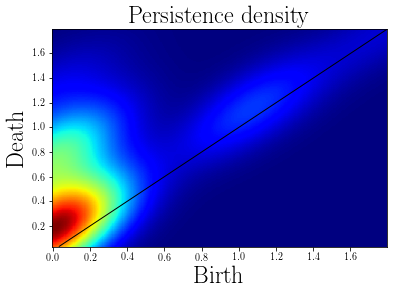

In [43]:
gd.plot_persistence_density(persistence=persistence_diagrams[index_0], cmap='jet', fontsize=24)
#plt.savefig('persistence_density_Y1_survivor_pat47.png', dpi=300, bbox_inches='tight')

In [44]:
help(gd.plot_persistence_density)

Help on function plot_persistence_density in module gudhi.persistence_graphical_tools:

plot_persistence_density(persistence=[], persistence_file='', nbins=300, bw_method=None, max_intervals=1000, dimension=None, cmap=None, legend=False, axes=None, fontsize=16, greyblock=False)
    This function plots the persistence density from persistence
    values list, np.array of shape (N x 2) representing a diagram
    in a single homology dimension,
    or from a `persistence diagram <fileformats.html#persistence-diagram>`_ file.
    Be aware that this function does not distinguish the dimension, it is
    up to you to select the required one. This function also does not handle
    degenerate data set (scipy correlation matrix inversion can fail).
    
    :Requires: `SciPy <installation.html#scipy>`_
    
    :param persistence: Persistence intervals values list. 
                        Can be grouped by dimension or not.
    :type persistence: an array of (dimension, array of (birth, death)

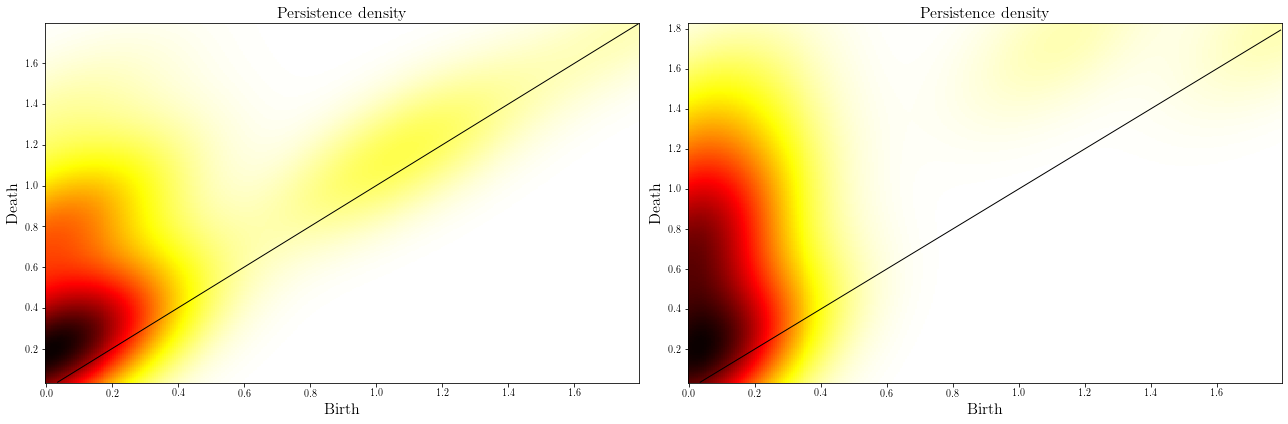

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
gd.plot_persistence_density(persistence=persistence_diagrams[index_0],axes=axes[0])
gd.plot_persistence_density(persistence=persistence_diagrams[index_1],axes=axes[1])
plt.tight_layout()
#plt.show()
plt.savefig('persistence_density_Y1_survivor_nonsurvivor.png', bbox_inches='tight')
plt.show()

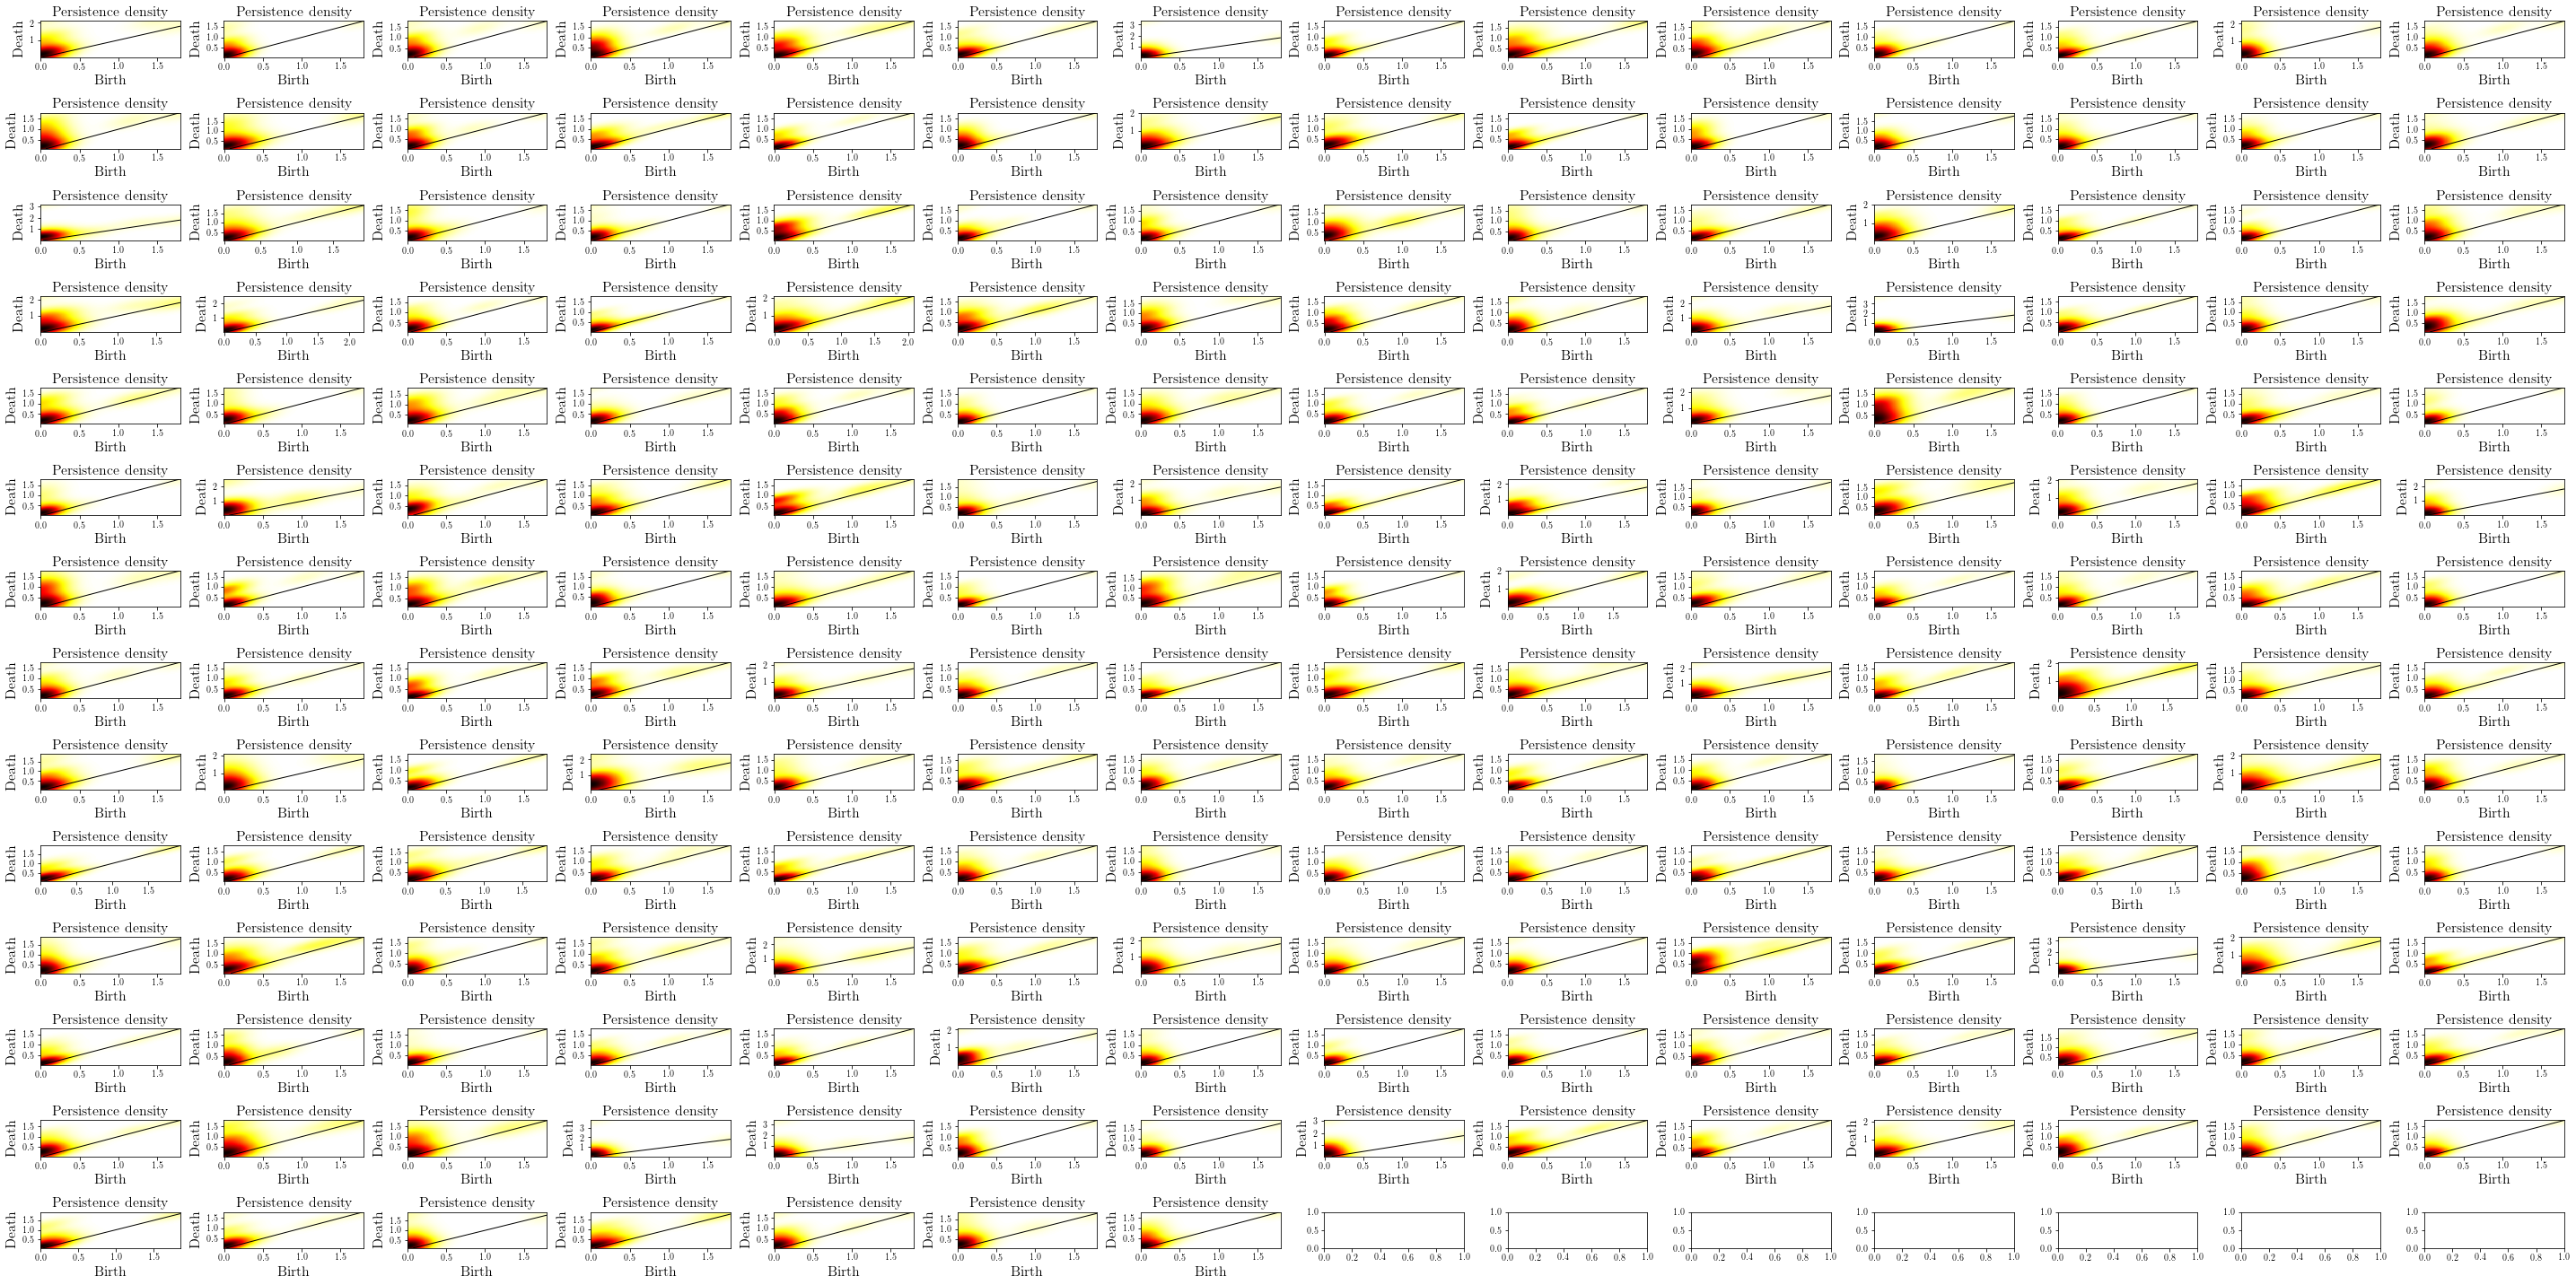

In [45]:
#Full-length
ax = tuple(['ax'+str(x) for x in range(189)])
    
fig, ax = plt.subplots(14,14, figsize=(40, 20))

for i in range(189):
        gd.plot_persistence_density(persistence=persistence_diagrams[i], axes=ax.flatten()[i])
        #plt.title("PI of $H_1$ for Y1 survivor" + str(i))

#plt.axis('off')        
plt.tight_layout()
#plt.show()
plt.savefig('persistence_density_Y1_survivor_full.png', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: Matplotlib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



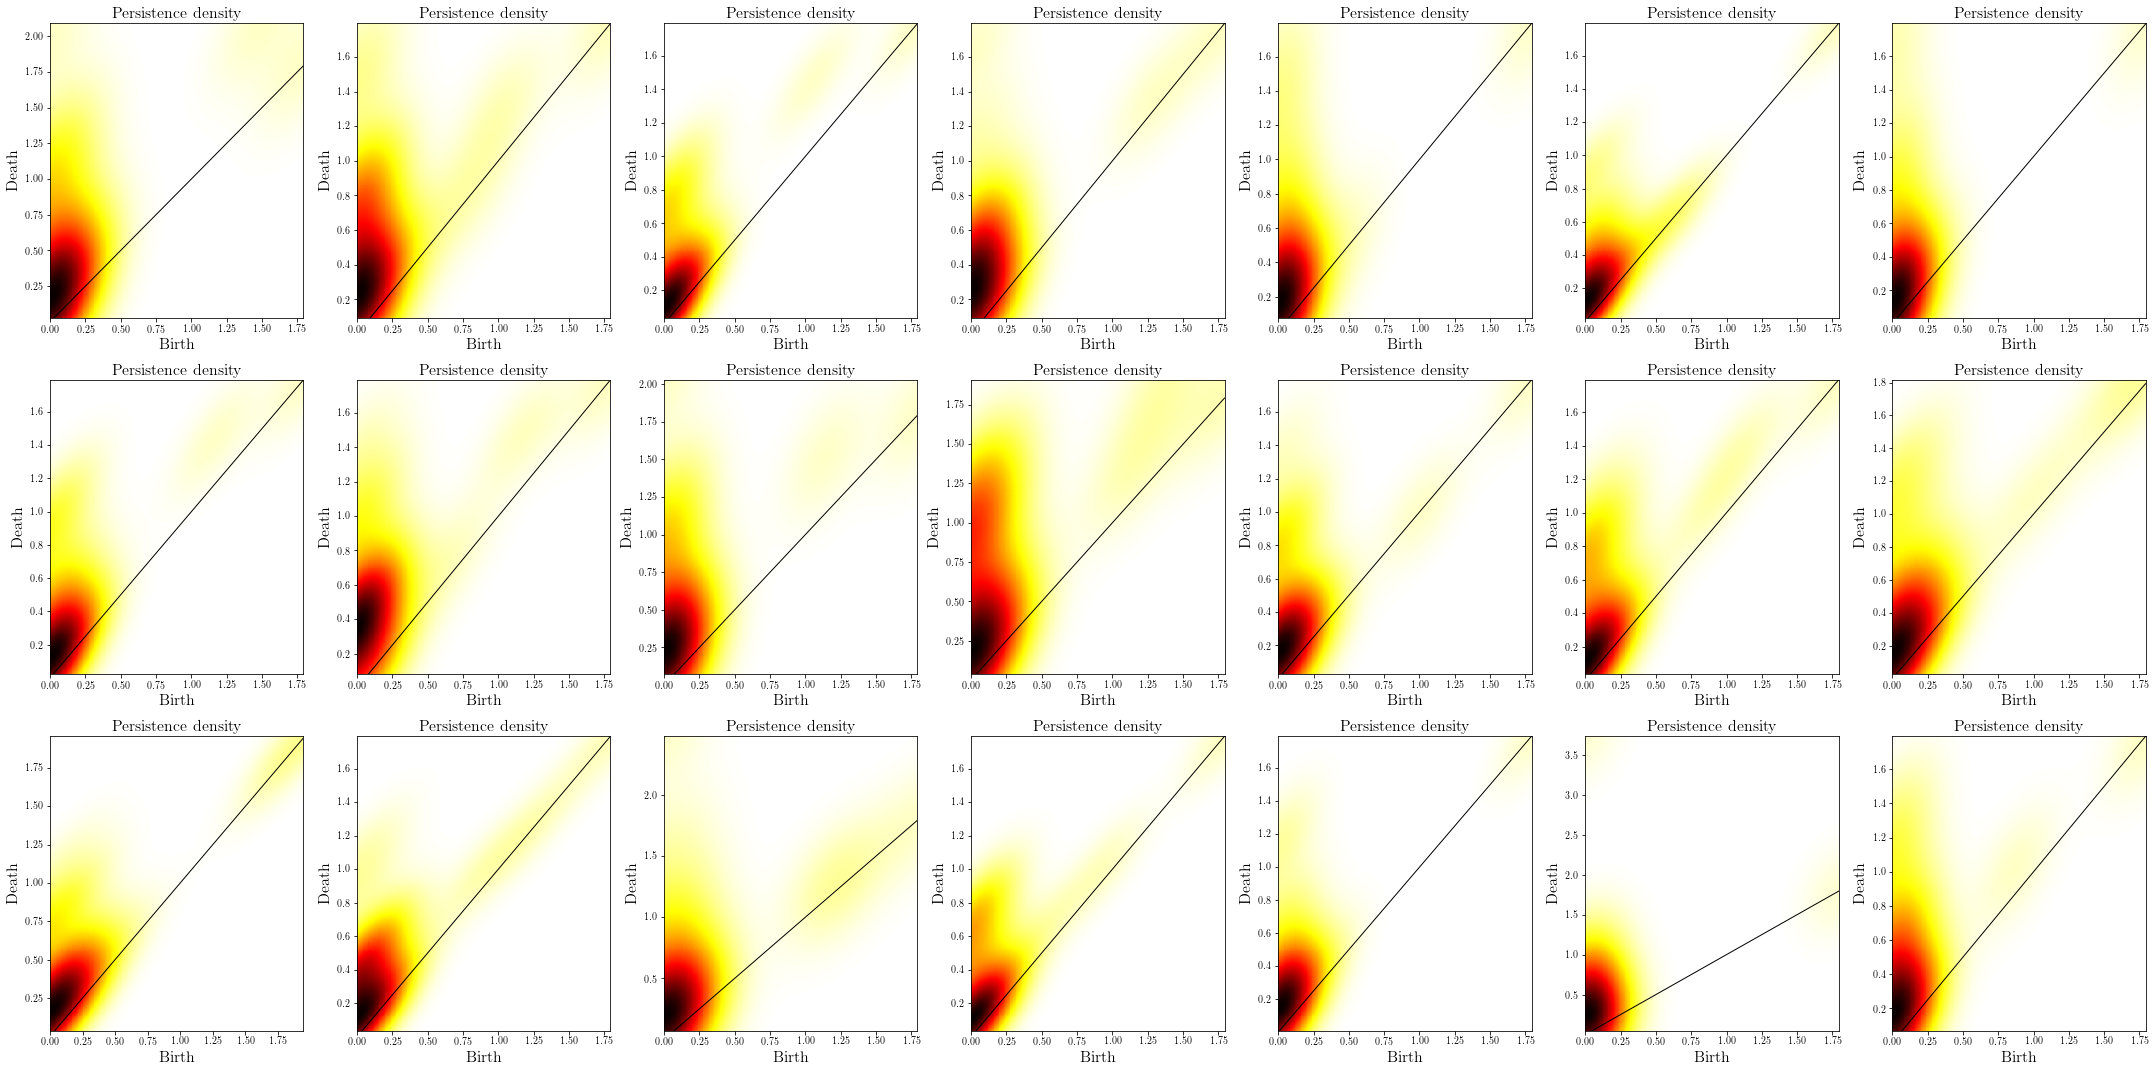

In [370]:
#Y1 survivor
ax = tuple(['ax'+str(x) for x in range(21)])
    
fig, ax = plt.subplots(3,7, figsize=(30, 15))

subsample = persistence_diagrams[0:189:9] 

for i in range(len(subsample)):
        gd.plot_persistence_density(persistence=subsample[i], axes=ax.flatten()[i])
        #plt.title("PI of $H_1$ for Y1 survivor" + str(i))

#plt.axis('off')        
plt.tight_layout()
#plt.show()
plt.savefig('persistence_density_Y1_survivor.png', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: Matplotlib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: Matplotlib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: Matplotlib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



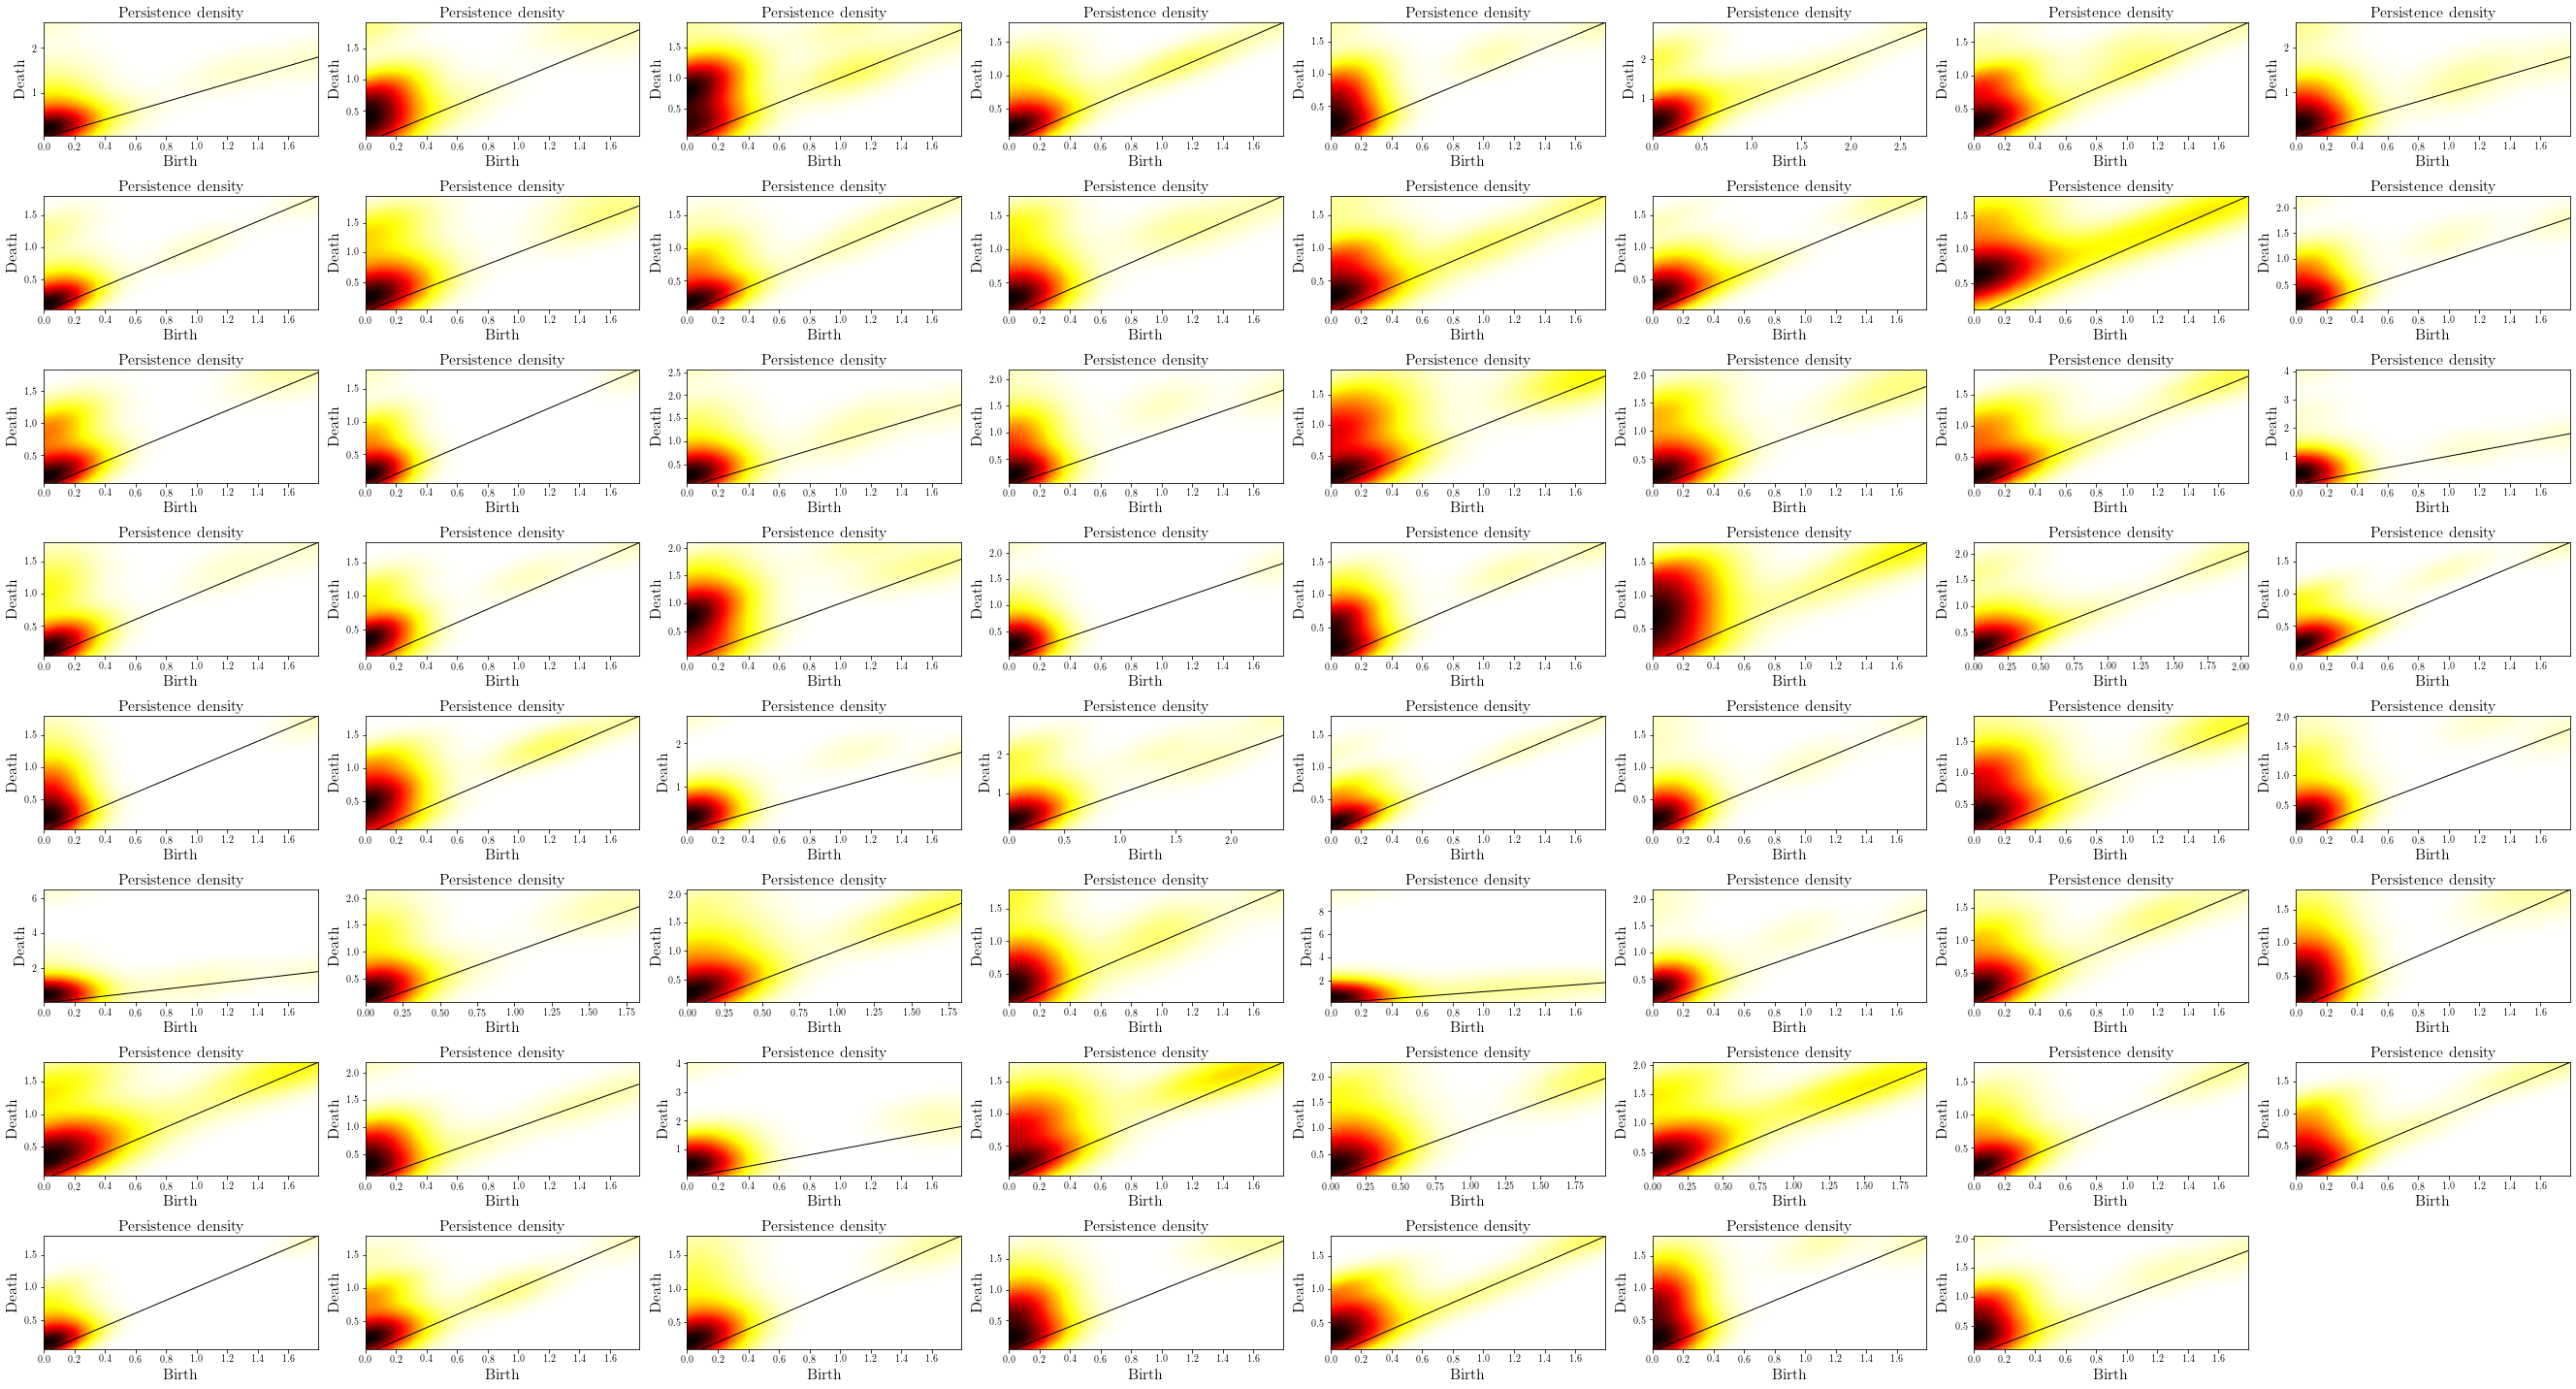

In [371]:
#Y1 Non-survivor
ax = tuple(['ax'+str(x) for x in range(63)])
    
fig, ax = plt.subplots(8,8, figsize=(37, 20))

for i in range(63):
    gd.plot_persistence_density(persistence=persistence_diagrams[189+i], axes=ax.flatten()[i])
    #plt.title("PI of $H_1$ for Y1 survivor" + str(i))

plt.axis('off')    
plt.tight_layout()
#plt.show()
plt.savefig('Persistence_density_Y1_non_survivor.png', bbox_inches='tight')

Text(0.5, 1.0, 'Persistence Image')

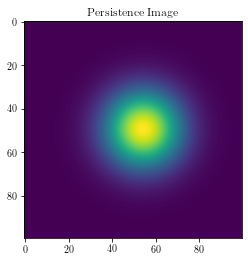

In [50]:
plt.imshow(np.flip(np.reshape(pi2[67], [100,100]), 0))
plt.title("Persistence Image")

In [42]:
persistence_diagrams[:,:,:-1]

array([[[0.        , 0.02680994],
        [0.        , 0.03499579],
        [0.        , 0.07041855],
        ...,
        [0.10177389, 0.10177389],
        [0.10177389, 0.10177389],
        [1.79327548, 1.79327548]],

       [[0.        , 0.0392024 ],
        [0.        , 0.04737386],
        [0.        , 0.07736459],
        ...,
        [0.10177389, 0.10177389],
        [0.10177389, 0.10177389],
        [1.79327548, 1.79327548]],

       [[0.        , 0.09228391],
        [0.        , 0.09847613],
        [0.        , 0.09950761],
        ...,
        [0.10177389, 0.10177389],
        [0.10177389, 0.10177389],
        [1.79327548, 1.79327548]],

       ...,

       [[0.        , 0.1264966 ],
        [0.        , 0.15257303],
        [0.        , 0.15931652],
        ...,
        [0.10177389, 0.10177389],
        [0.10177389, 0.10177389],
        [1.79327548, 1.79327548]],

       [[0.        , 0.03499579],
        [0.        , 0.07041855],
        [0.        , 0.1264966 ],
        .

In [46]:
import argparse
import collections
import itertools
import glob
import os

import matplotlib.pyplot as plt

from persim import PersImage

#from topology import load_persistence_diagram_json

#from utilities import parse_filename

#from tqdm import tqdm


def embed(subject, diagrams, suffix):
    pairs = list(itertools.chain.from_iterable(diagrams))

    clf = PersImage(pixels=(50,50),specs={"maxBD":5, "minBD":-2})#, spread=1.0)
    img = clf.transform(pairs)

    path = f'../results/persistence_images_mean_s1.0/{suffix}'

    plt.imshow(img, cmap='Spectral')

    # Create output directories for storing *all* subjects in. This
    # depends on the input file.
    os.makedirs(path, exist_ok=True)
    plt.savefig(os.path.join(path, f'{subject}.png'))



/Users/morilla/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning:

Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.



PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50

PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50

PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50

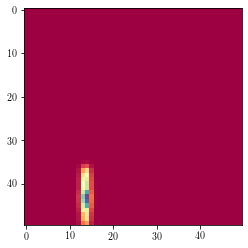

In [47]:
#persistence images of Y1 survivors
for i in range(1,190):
    embed(subject0.values[i-1:i][0], persistence_diagrams[i-1:i,:,:-1],'survivor')

/Users/morilla/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning:

Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.



PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50), spread=None, specs={'maxBD': 5, 'minBD': -2}, kernel_type="gaussian", weighting_type="linear")
PersImage(pixels=(50, 50

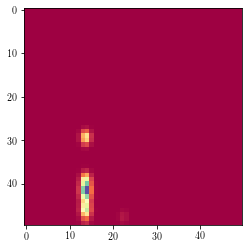

In [48]:
# persistence images of Y1 non-survivors
for i in range(1,64):
    embed(subject1.values[i-1:i][0], persistence_diagrams[189+i-1:189+i,:,:-1],'non-survivor')

In [49]:
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [50]:
help(NearestNeighbors)

Help on class NearestNeighbors in module sklearn.neighbors._unsupervised:

class NearestNeighbors(sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.RadiusNeighborsMixin, sklearn.neighbors._base.NeighborsBase)
 |  NearestNeighbors(*, n_neighbors=5, radius=1.0, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, n_jobs=None)
 |  
 |  Unsupervised learner for implementing neighbor searches.
 |  
 |  Read more in the :ref:`User Guide <unsupervised_neighbors>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  radius : float, default=1.0
 |      Range of parameter space to use by default for :meth:`radius_neighbors`
 |      queries.
 |  
 |  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
 |      Algorithm used to compute the nearest neighbors:
 |  
 |      - 'ball_tree' will use :class:`BallTree

In [51]:
from gtda.diagrams import PersistenceLandscape, Silhouette

In [53]:
pl = PersistenceLandscape() #189 survivors, 189-252 non-survivors.
plc_bascic= pl.fit_transform_plot(persistence_diagrams, sample=0, plotly_params={"traces": {"line": {"width": 3}}})

In [56]:
sl = Silhouette()
slc_bascic= sl.fit_transform_plot(persistence_diagrams, sample=0, plotly_params={"traces": {"line": {"width": 3}}})

In [57]:
PersistenceLandscape().get_params(deep=True)

{'n_bins': 100, 'n_jobs': None, 'n_layers': 1}